## **Ordenamiento Topológico - Algoritmo de Kahn**

El **algoritmo de Kahn** permite encontrar una ordenación topológica en un grafo dirigido acíclico **(DAG)**

In [1]:
import graphviz as gv

Definimos la lista de procesos que el algoritno de Kahn ordenará topológicamente.

Esto significa que el proceso A es el primero en ejecutarse, seguido por C y B (que no tienen dependencias directas), luego D (que depende de B y C), luego F (que depende de D) y finalmente E (que también depende de D).

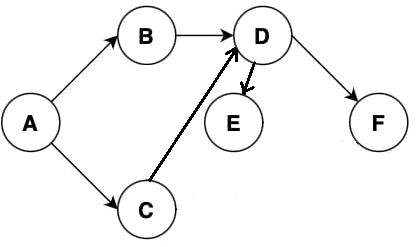

## Implementacion

In [2]:
# Específicamente, el -> marca la anotación de la función de retorno.

def topological_sort(nodos: dict[str, list[str]]) -> list[str]:
    """
    Topological sort para una red de nodos

        nodos = {"A": ["B", "C"], "B": [], "C": ["B"]}
        topological_sort(nodos)
        # ["A", "C", "B"]

    :param nodos: Nodos de la red
    :return: nodos en orden topologico en una lista de strings
    """

    # 1. Calcula el grado de entrada de cada nodo
    indegrees = {k: 0 for k in nodos.keys()}
    for name, dependencias in nodos.items():
        for dependencia in dependencias:
            indegrees[dependencia] += 1

    # 2. Crea una cola con los nodos con grado de entrada cero
    queue = [k for k in nodos.keys() if indegrees[k] == 0]

    # 3. Inicializa el ordenamiento topológico
    final_order = []

    # Continua hasta que todos los nodos hayan sido visitados o recorridos
    while len(queue) > 0:

        # nodo de la iteración actual es el primero de la cola
        curr = queue.pop(0)
        final_order.append(curr)

        # eliminar el nodo actual de otras dependencias
        for dependencia in nodos[curr]:
            indegrees[dependencia] -= 1

            if indegrees[dependencia] == 0:
                queue.append(dependencia)

    # 5. Si quedan nodos en el grafo, entonces hay un ciclo
    if len(final_order) != len(nodos):
        raise Exception("El grafo contiene un ciclo,")

    return final_order

Probemos al algoritmo con el siguiente grafo:

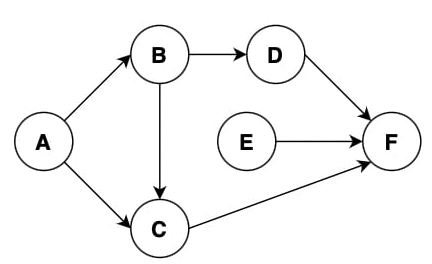

La red de nodos se muestra a continuación:

In [3]:

nodos = {
    "E": ["F"],
    "A": ["B", "C"],
    "B": ["C", "D"],
    "C": ["F"],
    "D": ["F"],
    "F": []
}

'''
nodos = {
    "A": ["B", "C"],
    "B": ["C", "D"],
    "F": ["C","E", "D"],
    "F": []
}
'''

'\nnodos = {\n    "A": ["B", "C"],\n    "B": ["C", "D"],\n    "F": ["C","E", "D"],\n    "F": []\n}\n'

In [4]:
#Ejemplo# 1: Ejecutamos el algoritmo

orden = topological_sort(nodos)
print(orden)

['E', 'A', 'B', 'C', 'D', 'F']


In [5]:
#Ejemplo #2:

nodos1 = {
    "A": ["B", "C"],
    "B": ["D"],
    "C": ["D"],
    "D": ["E", "F"],
    "E": [],
    "F": []
}


In [6]:
orden1 = topological_sort(nodos1)
print(orden1)

['A', 'B', 'C', 'D', 'E', 'F']


Crear el orden topologico para el siguiente proceso:

El proceso A depende de C, el proceso B depende de A, el proceso C depende de B y el proceso D depende de A, creando un ciclo. Si aplicas la función topological_sort(orden2) a esta lista, **la función arrojará un error indicando que hay un ciclo en el grafo**.

In [7]:
# Ejemplo #3:

nodos2 = {
    "A": ["C"],
    "B": ["A"],
    "C": ["B"],
    "D": ["A"],
    "D": [],
}


In [10]:
orden2 = topological_sort(nodos2)
print(orden2)

Exception: El grafo contiene un ciclo,